<h1><center>
--------Milestone 2--------
</h1></center>

<h2><center>
Nama  : Dendi Apriyandi

Batch : FTDS-005 (SBY) </h2></center>

Tujuan dari menganalisa dataset ini adalah untuk mengelompokkan nasabah bank ke dalam beberapa cluster untuk melihat perilakunya dan menerapkan strategi bisnis yang tepat pada setiap cluster.

# **I. INTRODUCTION**

## Problem Statement/Objective

Saya sebagai Data Scientist ditugaskan oleh bank untuk membuat model segmentasi pelanggan menggunakan K-Means clustering berdasarkan data penggunaan kartu kredit selama 6 bulan terakhir. Segmentasi ini memungkinkan bank untuk mengelompokkan pelanggan ke dalam kategori berbeda berdasarkan perilaku penggunaan kartu kredit mereka. Hal ini akan membantu bank mengelola pelanggan secara lebih efisien dengan menerapkan strategi bisnis yang sesuai untuk setiap segmen pelanggan.

## Data Introduction

|Column|Keterangan|Explaination|
|:----:|---------:|:-----------|
|`CUST_ID`|Identifikasi pemegang Kartu Kredit|*Identification of Credit Card holder*|
|`BALANCE`|Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian|*Balance amount left in their account to make purchases*|
|`BALANCE_FREQUENCY`|Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = jarang diperbarui)|*How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)*|
|`PURCHASES`|Jumlah pembelian yang dilakukan dari akun|*Amount of purchases made from account*|
|`PURCHASES_FREQUENCY`|Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)|*How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)*|
|`PURCHASES_TRX`|Jumlah transaksi pembelian yang dilakukan|*Number of purchase transactions made*|
|`INSTALLMENTS_PURCHASES`|Jumlah pembelian yang dilakukan secara cicilan|*Amount of purchase done in installment*|
|`PURCHASES_INSTALLMENTS_FREQUENCY`|Seberapa sering pembelian dengan cicilan dilakukan, skor antara 0 dan 1 (1 = sering dilakukan, 0 = jarang dilakukan)|*How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)*|
|`ONEOFF_PURCHASES`|Jumlah maksimum pembelian yang dilakukan sekaligus|*Maximum purchase amount done in one-go*|
|`ONEOFF_PURCHASES_FREQUENCY`|Seberapa sering pembelian sekaligus terjadi, skor antara 0 dan 1 (1 = sering dibeli, 0 = jarang dibeli)|*How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)*|
|`CASH_ADVANCE`|Uang muka yang diberikan oleh pengguna|*Cash in advance given by the user*|
|`CASH_ADVANCE_FREQUENCY`|Seberapa sering uang muka dibayarkan|*How frequently the cash in advance being paid*|
|`CASH_ADVANCE_TRX`|Jumlah Transaksi yang dilakukan dengan `Uang Muka`|*Number of Transactions made with `Cash in Advanced`*|
|`PAYMENTS`|Jumlah Pembayaran yang dilakukan oleh pengguna|*Amount of Payment done by user*|
|`MINIMUM_PAYMENTS`|Jumlah minimum pembayaran yang dilakukan oleh pengguna|*Minimum amount of payments made by user*|
|`PRC_FULL_PAYMENT`|Persentase pembayaran penuh yang dibayar oleh pengguna|*Percent of full payment paid by user*|
|`CREDIT_LIMIT`|Batas Kredit Kartu Kredit untuk pengguna|*Limit of Credit Card for user*|
|`TENURE`|Masa kepemilikan layanan kartu kredit untuk pengguna|*Tenure of credit card service for user*|

# II. **QUERY SQL**

In [1]:
# Menginstall Big Query di Google Colab
# !pip install google-cloud-bigquery google-auth

# # Mengkoneksikan colab dengan big query

# from google.colab import auth
# from google.cloud import bigquery
# auth.authenticate_user()
# print('Authenticated')

# project_id = "boxwood-ellipse-403804"
# client = bigquery.Client(project=project_id)

# query = '''
# SELECT * 
# FROM `ftds-hacktiv8-project.phase1_ftds_005_sby.credit-card-information`
# WHERE MOD(CUST_ID, 2) = 1;
# '''

# Membuat variabel baru dari query
# df = client.query(query).to_dataframe()

In [2]:
# Menyimpan file dengan nama 'P1G6_Set_1_dendi.csv'
# df.to_csv('P1G6_Set_1_dendi.csv', index=False)

# III. **IMPORT LIBRARY**

In [3]:
# Untuk membaca dan membuat dataframe
import pandas as pd

# Mempersiapkan array untuk menghitung perhitungan matematika
import numpy as np

# Untuk membuat visualisasi data pada EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk menyimpan model
import pickle

# method untuk melakukan caping outlier
from feature_engine.outliers import Winsorizer

# Untuk melakukan preprocessing fitur transformasi
from sklearn.preprocessing import MinMaxScaler

# Untuk melakukan pengecekan variabel yang mempunyai multikolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dimensionality Reduction menggunakan PCA
from sklearn.decomposition import PCA

# Mencari nilai optimaldari clusters menggunakan metode elbow
from sklearn.cluster import KMeans

# Untuk membuat Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# IV. **DATA EXPLORATION**

## Data Loading

In [4]:
df=pd.read_csv('P1G6_Set_1_dendi.csv')

- dataframe `P1G6_Set_1_dendi.csv` telah berhasil di-load

In [5]:
# Menampilkan 10 data pertama
print("\n10 Data Pertama:")
df.head(10)


10 Data Pertama:


CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

- 10 data pertama berhasil ditampilkan

In [6]:
# Menampilkan 10 data terakhir
print("\n10 Data Terakhir:")
df.tail(10)


10 Data Terakhir:


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

- 10 data terakhir berhasil ditampilkan

## Data Copy

Membuat salinan `df`. `df1` adalah salinan dari `df`, dan perubahan pada `df1` tidak akan mempengaruhi `df`

In [7]:
# Membuat salinan dari DataFrame df dan menyimpannya ke dalam df1
df1 = df.copy()

- df1 telah berhasil dibuat

## Data Overview

### Basic Information

In [8]:
# Menampilkan informasi umum data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

- pada dataset terdapat 14 kolom dengan tipe data float64 dan 4 kolom dengan tipe data int64

### Descriptive Statistic

In [9]:
# Menghasilkan summary statistik dari dataframe df dan mentranspose hasilnya
df1.describe().T

count         mean          std        min  \
CUST_ID                           4475.0  4475.000000  2583.931114   1.000000   
BALANCE                           4475.0  1563.205717  2072.045789   0.000000   
BALANCE_FREQUENCY                 4475.0     0.876933     0.238222   0.000000   
PURCHASES                         4475.0  1003.251343  2060.034730   0.000000   
ONEOFF_PURCHASES                  4475.0   596.369893  1653.425984   0.000000   
INSTALLMENTS_PURCHASES            4475.0   407.110215   880.799744   0.000000   
CASH_ADVANCE                      4475.0   984.288554  2060.448056   0.000000   
PURCHASES_FREQUENCY               4475.0     0.490579     0.402907   0.000000   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202301     0.298203   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.363886     0.397603   0.000000   
CASH_ADVANCE_FREQUENCY            4475.0     0.136132     0.201036   0.000000   
CASH_ADVANCE_TRX                  4475.0     3.301229     7.134727   0.000000   
PURCHASES_TRX                     4475.0    14.929162    25.540814   0.000000   
CREDIT_LIMIT                      4475.0  4494.878630  3609.267706  50.000000   
PAYMENTS                          4475.0  1740.075430  2827.633858   0.000000   
MINIMUM_PAYMENTS                  4320.0   873.976757  2436.877272   0.019163   
PRC_FULL_PAYMENT                  4475.0     0.150224     0.289081   0.000000   
TENURE                            4475.0    11.518212     1.328925   6.000000   

                                          25%          50%          75%  \
CUST_ID                           2238.000000  4475.000000  6712.000000   
BALANCE                            124.432849   871.355430  2047.570799   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.560000   360.000000  1102.420000   
ONEOFF_PURCHASES                     0.000000    45.650000   575.220000   
INSTALLMENTS_PURCHASES               0.000000    88.620000   455.885000   
CASH_ADVANCE                         0.000000     0.000000  1138.887754   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.250000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.250000   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           376.913051   877.494612  1911.596530   
MINIMUM_PAYMENTS                   168.590144   313.980229   819.371080   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.125000   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
CUST_ID                            8949.00000  
BALANCE                           18495.55855  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         41050.40000  
ONEOFF_PURCHASES                  40624.06000  
INSTALLMENTS_PURCHASES            14686.10000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       347.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

- jika dilihat perbedaan antara mean dan median, data cenderung tidak normal ("skewed"), kecuali PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY

### Shape

In [10]:
# Menampilkan jumlah baris dan kolom dalam dataframe
df.shape

# Menampilkan jumlah baris dan kolom dalam DataFrame
print("Jumlah baris dalam DataFrame:", df1.shape[0])
print("Jumlah kolom dalam DataFrame:", df1.shape[1])

Jumlah baris dalam DataFrame: 4475
Jumlah kolom dalam DataFrame: 18


- kita telah mengetahui jumlah baris dan kolom pada dataset

### Duplicate Data Overview

In [11]:
# Menghitung jumlah baris yang merupakan duplikat dalam dataframe df
df.duplicated().sum()

# Menampilkan jumlah baris duplikat
print('Jumlah duplikat dalam DataFrame:', df.duplicated().sum())

Jumlah duplikat dalam DataFrame: 0


- tidak terdapat duplikat dalam data

### Missing Values Overview

In [12]:
# Menghitung jumlah nilai yang hilang (NaN) di setiap kolom dataframe df
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- terdapat missing value yang harus pada kolom `MINIMUM_PAYMENTS`

In [13]:
# Melakukan iterasi pada setiap kolom di dataframe df
for i in df.columns:
    print(i)  # Menampilkan nama kolom
    print(df[i].value_counts())  # Menampilkan distribusi nilai unik dalam kolom tersebut
    print("--"*30)  # Garis pemisah antara setiap kolom


CUST_ID
CUST_ID
3091    1
3845    1
3905    1
3901    1
3895    1
       ..
17      1
75      1
109     1
327     1
1995    1
Name: count, Length: 4475, dtype: int64
------------------------------------------------------------
BALANCE
BALANCE
0.000000       43
10.035492       1
2073.611538     1
1091.973832     1
1143.409012     1
               ..
58.565355       1
177.371967      1
27.539766       1
31.980197       1
3447.674222     1
Name: count, Length: 4433, dtype: int64
------------------------------------------------------------
BALANCE_FREQUENCY
BALANCE_FREQUENCY
1.000000    3111
0.909091     211
0.818182     146
0.545455     115
0.727273     106
0.636364      99
0.454545      90
0.272727      81
0.363636      75
0.181818      71
0.000000      43
0.090909      33
0.833333      31
0.875000      26
0.888889      25
0.900000      25
0.500000      21
0.666667      19
0.857143      18
0.750000      10
0.777778      10
0.714286       9
0.571429       8
0.800000       8
0.285714      

Tidak terdapat pola sehingga missing values termasuk kedalam MCAR (Missing Completely at Random), analisis data bisa tetap valid jika metode yang tepat untuk menangani data hilang diterapkan, seperti imputasi menggunakan variabel lain yang terkait dengan missing value

Selanjutnya akan dilakukan drop

In [14]:
# Menghitung jumlah baris yang merupakan duplikat
missing_value = df.isna().sum().sum()

# Menghitung total jumlah baris dalam dataframe
total_rows = df.shape[0]

# Menghitung persentase baris duplikat dari total baris
percentage_missing_values = (missing_value / total_rows) * 100

# Menampilkan hasil persentase duplikat dengan 2 angka desimal
print(f"Persentasi banyak missing value dalam data: {percentage_missing_values:.2f}%")


Persentasi banyak missing value dalam data: 3.46%


- Saya memutuskan untuk menghapus missing value karena nilainya tidak lebih/kurang dari 5%

## Data Cleaning

In [15]:
# Menghapus semua baris yang mengandung missing value dari DataFrame df1
df1 = df1.dropna()

# Mengecek ulang missing values
df1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- Sekarang, df1 tidak memiliki baris dengan missing value.
- Ini berguna untuk analisis yang membutuhkan data lengkap tanpa missing value.

### Outlier Handling

saya akan menghapus kolom CUST_ID karena memiliki kardinalitas tingi dan TENURE karena tipe datanya kategorikal (kategorical column tidak bisa terbaca oleh PCA dan K-Means)

In [16]:
# Menghapus kolom 'TENURE' dan 'CUST_ID' dari DataFrame df1, menyimpan hasilnya ke df_numeric
df_numeric = df1.drop(columns=['TENURE','CUST_ID'])

# Menampilkan informasi umum tentang df_numeric, seperti jumlah baris, tipe data, dan jumlah nilai non-null untuk setiap kolom
df_numeric.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 2 to 4474
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4320 non-null   float64
 1   BALANCE_FREQUENCY                 4320 non-null   float64
 2   PURCHASES                         4320 non-null   float64
 3   ONEOFF_PURCHASES                  4320 non-null   float64
 4   INSTALLMENTS_PURCHASES            4320 non-null   float64
 5   CASH_ADVANCE                      4320 non-null   float64
 6   PURCHASES_FREQUENCY               4320 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4320 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4320 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4320 non-null   float64
 10  CASH_ADVANCE_TRX                  4320 non-null   int64  
 11  PURCHASES_TRX                     4320 non-null   int64  
 12  CREDIT_LIMI

- Kolom 'TENURE' dan 'CUST_ID' telah berhasil dihapus

In [17]:
# List untuk menyimpan nama kolom dengan distribusi normal dan non-normal berdasarkan skewness
data_numerik_normal = []
data_numerik_non_normal = []

# Loop untuk mengecek skewness setiap kolom di df_numeric
for i in df_numeric.columns:
    # Menghitung skewness dari kolom i
    skew = df_numeric[i].skew()
    
    # Jika skewness >= 0.5 atau <= -0.5, maka dianggap non-normal
    if (skew >= 0.5) | (skew <= -0.5):
        data_numerik_non_normal.append(i)
    # Jika skewness antara -0.5 dan 0.5, maka dianggap normal
    elif (skew < 0.5) & (skew >= -0.5):
        data_numerik_normal.append(i)
    
    # Mencetak nilai skewness dari kolom i
    print('Nilai skewness dari', i, 'adalah', skew)

Nilai skewness dari BALANCE adalah 2.3060560083334405
Nilai skewness dari BALANCE_FREQUENCY adalah -2.085655942874467
Nilai skewness dari PURCHASES adalah 6.982698043897626
Nilai skewness dari ONEOFF_PURCHASES adalah 9.827307004944023
Nilai skewness dari INSTALLMENTS_PURCHASES adalah 6.252820447484483
Nilai skewness dari CASH_ADVANCE adalah 5.611537241356356
Nilai skewness dari PURCHASES_FREQUENCY adalah 0.030477479947374164
Nilai skewness dari ONEOFF_PURCHASES_FREQUENCY adalah 1.5142430379734177
Nilai skewness dari PURCHASES_INSTALLMENTS_FREQUENCY adalah 0.4891007516065457
Nilai skewness dari CASH_ADVANCE_FREQUENCY adalah 1.8028579475499225
Nilai skewness dari CASH_ADVANCE_TRX adalah 6.352409253171002
Nilai skewness dari PURCHASES_TRX adalah 4.694066710265747
Nilai skewness dari CREDIT_LIMIT adalah 1.487940822693631
Nilai skewness dari PAYMENTS adalah 5.720098998110234
Nilai skewness dari MINIMUM_PAYMENTS adalah 14.669771084332641
Nilai skewness dari PRC_FULL_PAYMENT adalah 1.91890164

In [18]:
# Menampilkan variabel atau objek yang berisi data numerik yang telah dinormalisasi
data_numerik_normal

['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']

- terbukti bahwa PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY distribusinya normal

- kolom yang tidak normal terdapat dalam list `data_numerik_non_normal` dibawah: 

In [19]:
# Variabel atau objek yang mungkin berisi data numerik sebelum dilakukan normalisasi
data_numerik_non_normal

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

# V. **EXPLORATORY DATA ANALYSIS**

### Distribution Check

Mengecek distribusi pada semua kolom

In [20]:
def eda_analysis(feature):
    """
    Analisis EDA (Exploratory Data Analysis) untuk suatu fitur dalam dataframe df1.

    Parameters:
    - feature: Nama fitur yang ingin dianalisis (string)

    Output:
    - Box plot untuk fitur tersebut
    - Skewness dari fitur tersebut
    """
    df1[feature].plot(kind='box')  # Menampilkan box plot untuk fitur yang dipilih
    skew = df1[feature].skew()  # Menghitung skewness dari fitur tersebut
    print('Skewness from', feature, 'is', skew)  # Menampilkan nilai skewness dari fitur tersebut


#### Normal Distribution

Skewness from PURCHASES_FREQUENCY is 0.030477479947374164


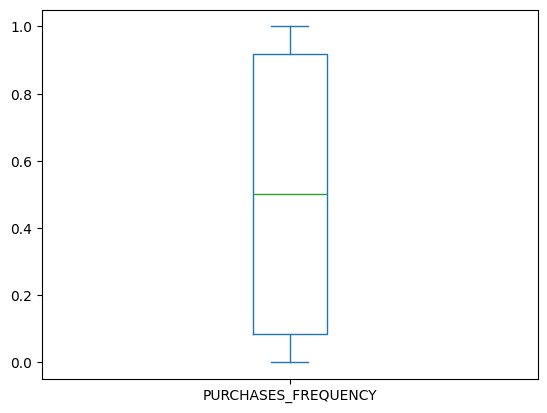

In [21]:
# Memanggil fungsi eda_analysis dengan fitur 'PURCHASES_FREQUENCY'
eda_analysis('PURCHASES_FREQUENCY')

Skewness from PURCHASES_INSTALLMENTS_FREQUENCY is 0.4891007516065457


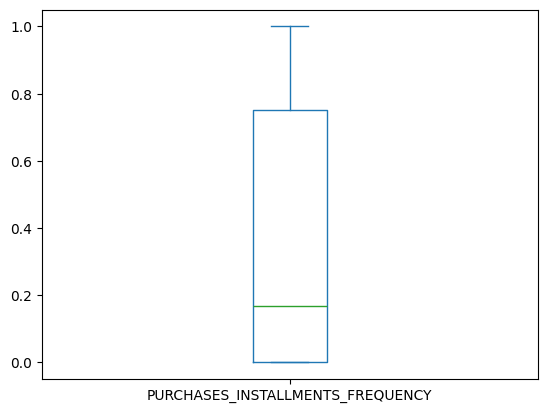

In [22]:
# Memanggil fungsi eda_analysis dengan fitur 'PURCHASES_INSTALLMENTS_FREQUENCY'
eda_analysis('PURCHASES_INSTALLMENTS_FREQUENCY')

- Setelah dilakukan analisa, tidak terdapat outlier pada dua kolomnya

#### Non-Normal Distribution

Skewness from BALANCE is 2.3060560083334405


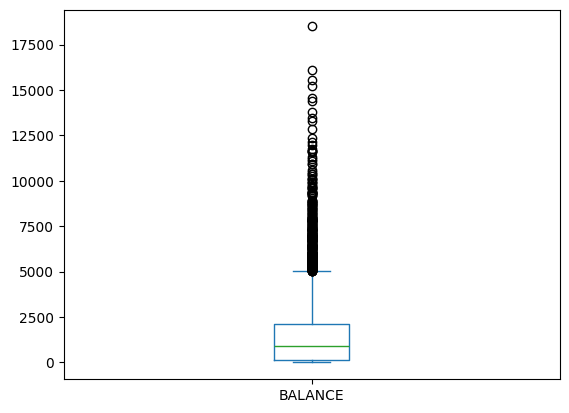

In [23]:
# Memanggil fungsi eda_analysis dengan fitur 'BALANCE'
eda_analysis('BALANCE')

Skewness from BALANCE_FREQUENCY is -2.085655942874467


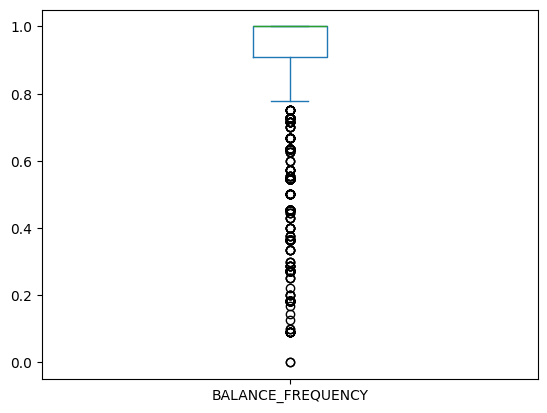

In [24]:
# Memanggil fungsi eda_analysis dengan fitur 'BALANCE_FREQUENCY'
eda_analysis('BALANCE_FREQUENCY')

Skewness from PURCHASES is 6.982698043897626


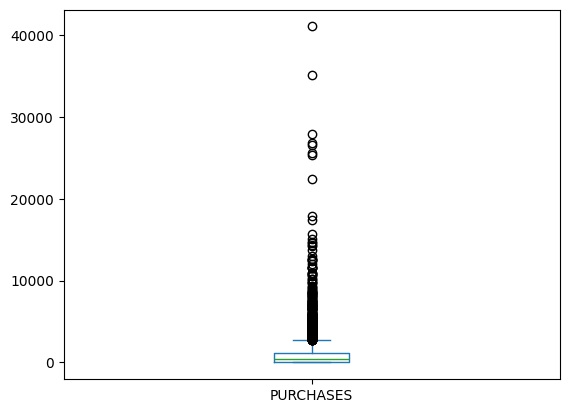

In [25]:
# Memanggil fungsi eda_analysis dengan fitur 'PURCHASES'
eda_analysis('PURCHASES')

Skewness from ONEOFF_PURCHASES is 9.827307004944023


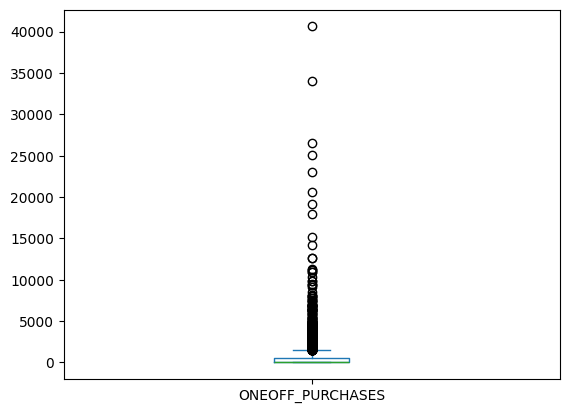

In [26]:
# Memanggil fungsi eda_analysis dengan fitur 'ONEOFF_PURCHASES'
eda_analysis('ONEOFF_PURCHASES')

Skewness from INSTALLMENTS_PURCHASES is 6.252820447484483


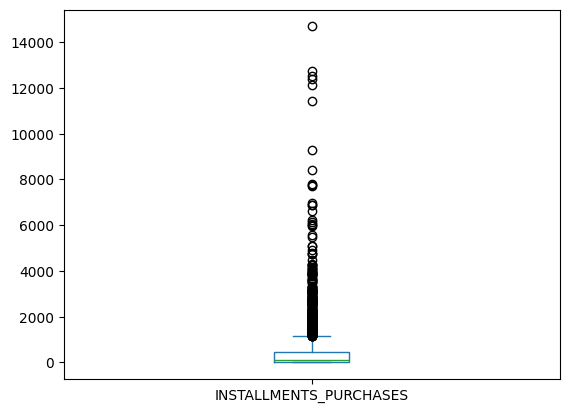

In [27]:
# Memanggil fungsi eda_analysis dengan fitur 'INSTALLMENTS_PURCHASES'
eda_analysis('INSTALLMENTS_PURCHASES')

Skewness from CASH_ADVANCE is 5.611537241356356


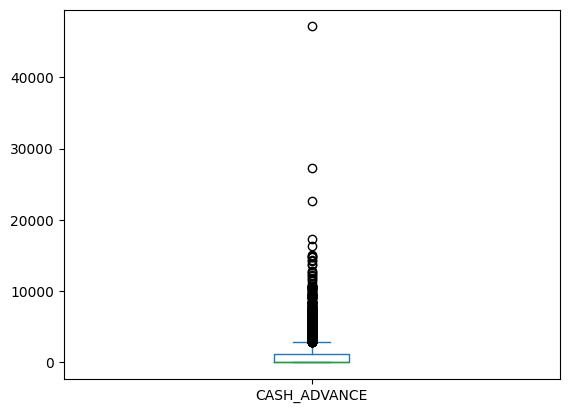

In [28]:
# Memanggil fungsi eda_analysis dengan fitur 'CASH_ADVANCE'
eda_analysis('CASH_ADVANCE')

Skewness from ONEOFF_PURCHASES_FREQUENCY is 1.5142430379734177


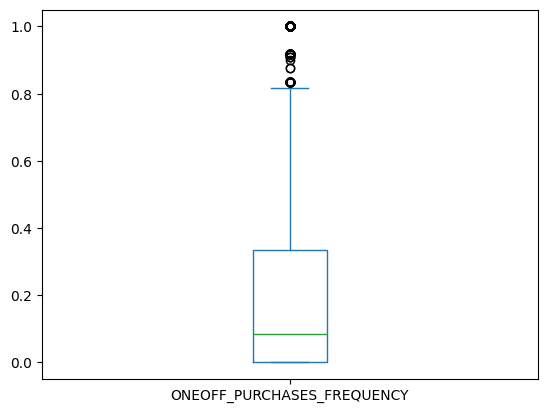

In [29]:
# Memanggil fungsi eda_analysis dengan fitur 'ONEOFF_PURCHASES_FREQUENCY'
eda_analysis('ONEOFF_PURCHASES_FREQUENCY')

Skewness from CASH_ADVANCE_FREQUENCY is 1.8028579475499225


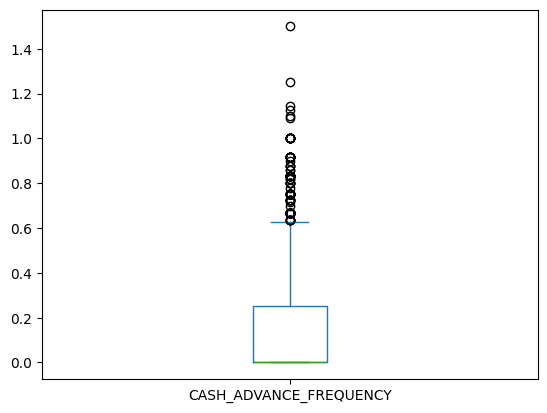

In [30]:
# Memanggil fungsi eda_analysis dengan fitur 'CASH_ADVANCE_FREQUENCY'
eda_analysis('CASH_ADVANCE_FREQUENCY')

Skewness from CASH_ADVANCE_TRX is 6.352409253171002


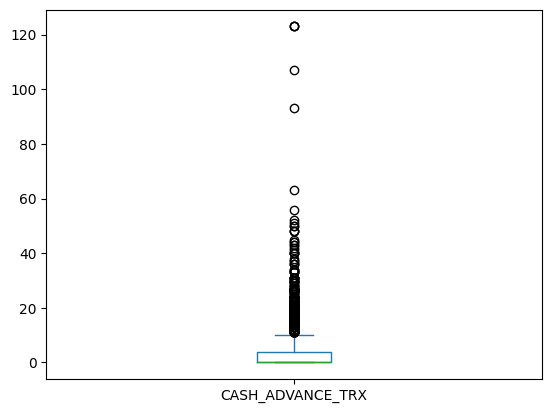

In [31]:
# Memanggil fungsi eda_analysis dengan fitur 'CASH_ADVANCE_TRX'
eda_analysis('CASH_ADVANCE_TRX')

Skewness from PURCHASES_TRX is 4.694066710265747


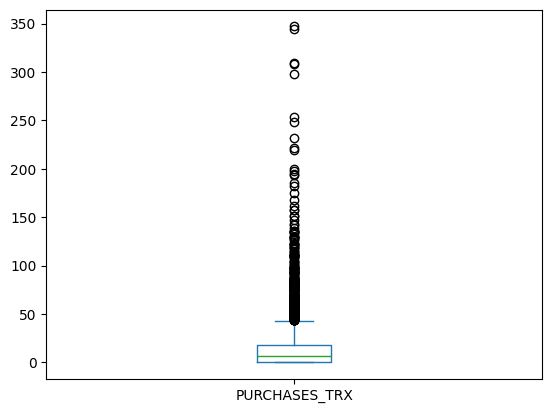

In [32]:
# Memanggil fungsi eda_analysis dengan fitur 'PURCHASES_TRX'
eda_analysis('PURCHASES_TRX')

Skewness from CREDIT_LIMIT is 1.487940822693631


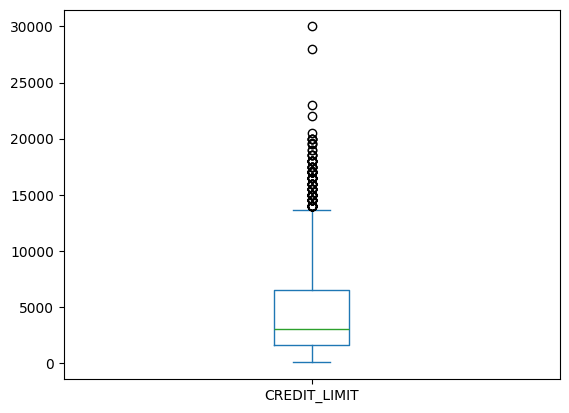

In [33]:
# Memanggil fungsi eda_analysis dengan fitur 'CREDIT_LIMIT'
eda_analysis('CREDIT_LIMIT')

Skewness from PAYMENTS is 5.720098998110234


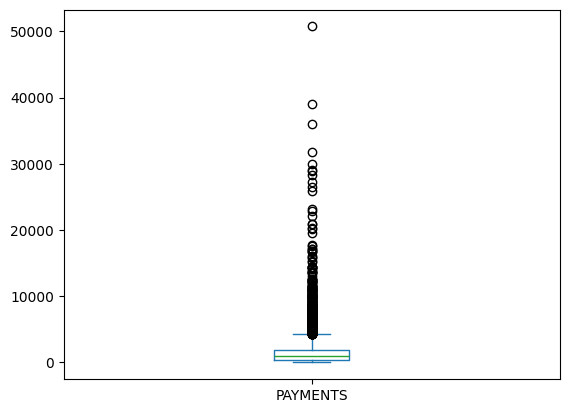

In [34]:
# Memanggil fungsi eda_analysis dengan fitur 'PAYMENTS'
eda_analysis('PAYMENTS')

Skewness from MINIMUM_PAYMENTS is 14.669771084332641


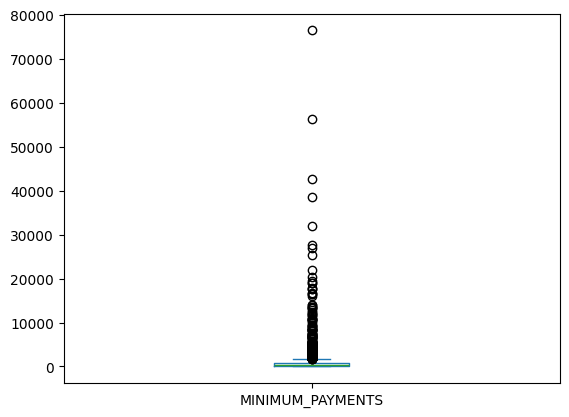

In [35]:
# Memanggil fungsi eda_analysis dengan fitur 'MINIMUM_PAYMENTS'
eda_analysis('MINIMUM_PAYMENTS')

Skewness from PRC_FULL_PAYMENT is 1.9189016413560516


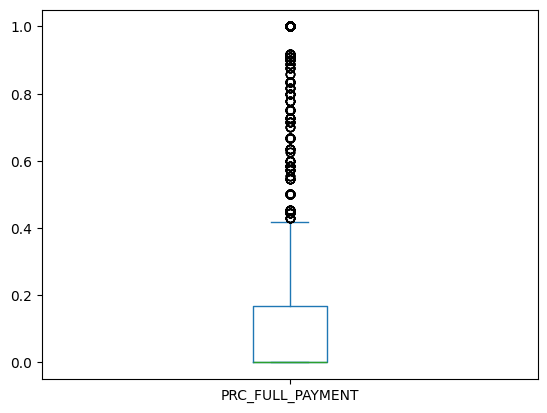

In [36]:
# Memanggil fungsi eda_analysis dengan fitur 'PRC_FULL_PAYMENT'
eda_analysis('PRC_FULL_PAYMENT')

### Tenure Share Percentage

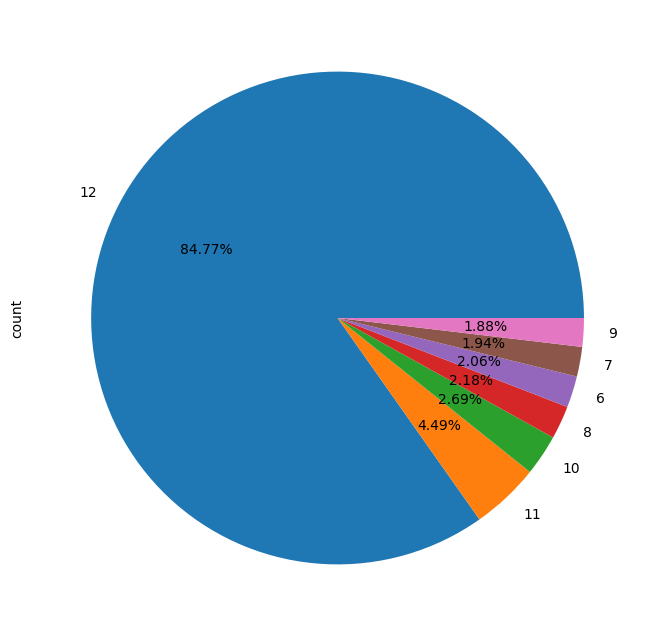

In [37]:
# Membuat figure dan axis dengan ukuran 8x8 inci
fig, ax1 = plt.subplots(figsize=(8, 8))

# Plotting diagram lingkaran untuk distribusi nilai dalam kolom 'TENURE'
df1['TENURE'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax1)

plt.show()  # Menampilkan diagram lingkaran

- Sebanyak 84.77% customer memiliki tenor 12 bulan

# VI. **FEATURE ENGINEERING**

## Numerical dan Categorical Columns

In [38]:
# Numerical dan Categorical Columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [39]:
# Categorical & Numerical Split
cat_cols = ['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']
num_cols = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [40]:
# Looping untuk memeriksa cardinalitas kolom-kolom kategorikal
for i in cat_cols:  # Iterasi melalui setiap kolom dalam daftar kolom kategorikal (cat_cols)
    print(i)  # Mencetak nama kolom yang sedang diperiksa
    print(df[i].value_counts())  # Mencetak jumlah kemunculan setiap nilai unik dalam kolom tersebut
    print("-" * 30)  # Mencetak garis pemisah untuk memudahkan pembacaan output

TENURE
TENURE
12    3777
11     199
10     122
6      101
8       99
7       90
9       87
Name: count, dtype: int64
------------------------------
CASH_ADVANCE_TRX
CASH_ADVANCE_TRX
0      2307
1       435
2       320
3       219
4       191
5       157
6       127
7       105
8        80
10       80
9        52
11       47
12       46
14       33
13       31
16       30
15       26
17       25
19       17
21       15
20       14
26       12
24       11
18       10
22        9
27        8
23        8
31        6
30        5
33        4
40        4
28        4
25        4
29        3
34        3
36        3
48        3
123       3
43        2
37        2
44        2
50        2
38        1
93        1
107       1
42        1
63        1
41        1
52        1
51        1
56        1
45        1
Name: count, dtype: int64
------------------------------
PURCHASES_TRX
PURCHASES_TRX
0      1022
1       344
12      272
2       194
6       163
       ... 
90        1
100       1
168       1
2

- Kolom diasumsikan numeric continuos agar bisa dianalisa menggunakan PCA

## Check Distribution

In [41]:
for i in df.columns:  # Iterasi melalui setiap nama kolom di dataframe df
    print(i)  # Cetak nama kolom
    print(df1[i].skew())  # Cetak nilai skewness dari kolom yang sesuai di dataframe df1
    print("-"*30)  # Garis pemisah antar kolom


CUST_ID
-0.000909576000153484
------------------------------
BALANCE
2.3060560083334405
------------------------------
BALANCE_FREQUENCY
-2.085655942874467
------------------------------
PURCHASES
6.982698043897626
------------------------------
ONEOFF_PURCHASES
9.827307004944023
------------------------------
INSTALLMENTS_PURCHASES
6.252820447484483
------------------------------
CASH_ADVANCE
5.611537241356356
------------------------------
PURCHASES_FREQUENCY
0.030477479947374164
------------------------------
ONEOFF_PURCHASES_FREQUENCY
1.5142430379734177
------------------------------
PURCHASES_INSTALLMENTS_FREQUENCY
0.4891007516065457
------------------------------
CASH_ADVANCE_FREQUENCY
1.8028579475499225
------------------------------
CASH_ADVANCE_TRX
6.352409253171002
------------------------------
PURCHASES_TRX
4.694066710265747
------------------------------
CREDIT_LIMIT
1.487940822693631
------------------------------
PAYMENTS
5.720098998110234
------------------------------


- Skewness terlihat tidak normal, selanjutnya akan dilakukan analisa menggunakan min-max scaller

In [42]:
# Melakukan drop pada CUST_ID karena kardinalitasnya tinggi/tiap barisnya unik
df_model=df1.drop(['CUST_ID'],axis=1)

In [43]:
# Memanggil daftar nama-nama kolom yang ada dalam dataframe df_model
df_model.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

- Kolom CUST_ID telah berhasil dihapus

## Scaling

In [44]:
scaler = MinMaxScaler()  # Membuat objek MinMaxScaler

df_scaled = scaler.fit_transform(df_model)  # Melakukan fitting dan transformasi pada df_model


## PCA

In [45]:
pca = PCA()  # Membuat objek PCA

pca.fit(df_scaled)  # Melakukan fitting PCA pada data yang telah diskalakan


PCA()

In [46]:
# Mencetak jumlah kolom dalam df_scaled
print(f"jumlah kolom: {df_scaled.shape[1]}")

jumlah kolom: 17


Curse of high dimentionality: semakin banyak fitur, model cenderung menjadi `overfit`

Maka dari itu PCA digunakan untuk mengurangi kemungkinan tersebut

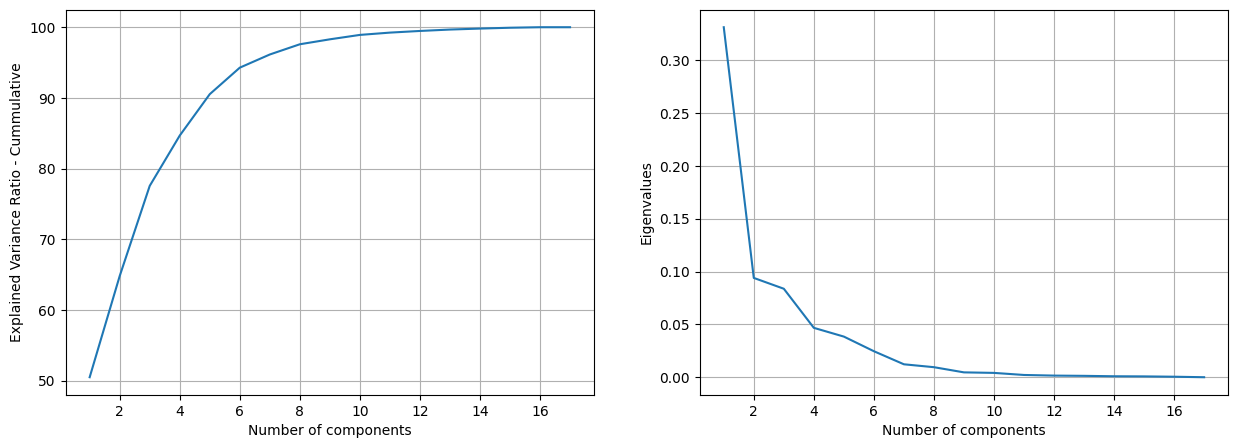

In [47]:
# Plot Cumulative Explained Variance Ratio
plt.figure(figsize=(15, 5))  # Membuat figure dengan ukuran 15x5 inci

plt.subplot(1, 2, 1)  # Membuat subplot pertama (1 baris, 2 kolom, subplot 1)
plt.grid()  # Menambahkan grid pada subplot
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))  # Plot Cumulative Explained Variance Ratio
plt.xlabel('Number of components')  # Menetapkan label sumbu x
plt.ylabel('Explained Variance Ratio - Cummulative')  # Menetapkan label sumbu y

# Plot Eigenvalues
plt.subplot(1, 2, 2)  # Membuat subplot kedua (1 baris, 2 kolom, subplot 2)
plt.grid()  # Menambahkan grid pada subplot
plt.plot(range(1, 18), pca.explained_variance_)  # Plot Eigenvalues
plt.xlabel('Number of components')  # Menetapkan label sumbu x
plt.ylabel('Eigenvalues')  # Menetapkan label sumbu y

plt.show()  # Menampilkan plot


- Terlihat dari Eigenvalues, komponen yang paling optimal yaitu 3 sampai 11

In [48]:
# Menghitung cumulative sum dari explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Menentukan jumlah komponen yang menjelaskan setidaknya 95% dari total variance
num_component = np.argmax(cumsum >= 0.95) + 1

# Menampilkan jumlah komponen optimal
num_component

7

- Setelah syntax dijalankan, untuk mempertahankan 95% `Explained Variance Ratio - Cummulative (EVR-Cumm)` ternyata yang paling optimal adalah 7

In [49]:
pca = PCA(n_components=10)  # Membuat objek PCA dengan 10 komponen (menyesuaikan jumlah komponen dari analisis EVR-Cumm)

df_scaled_pca = pca.fit_transform(df_scaled)  # Melakukan fitting dan transformasi pada df_scaled


# VII. **MODEL DEFINITION**

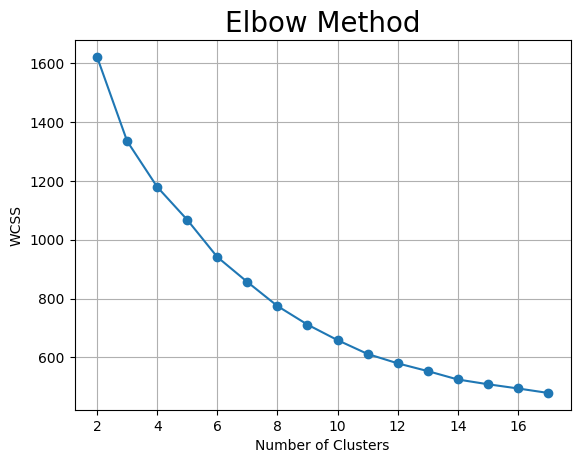

In [50]:
wcss = []  # List untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares)
random_state = 1  # Menetapkan nilai random state untuk reproduktifitas
max_cluster = 17  # Menetapkan jumlah maksimal cluster yang akan diuji

# Looping untuk cek cluster dari 2 sampai 17
for i in range(2, max_cluster+1):

    # Definisi model K-Means
    km = KMeans(n_clusters = i,       # Jumlah cluster
                init = 'k-means++',    # Metode inisialisasi
                max_iter = 300,        # Jumlah iterasi maksimal
                n_init = 10,           # Jumlah inisialisasi yang berbeda
                random_state = random_state)  # Nilai random state untuk reproduktifitas

    # Pelatihan model K-Means
    km.fit(df_scaled_pca)  # Melakukan fitting pada data yang telah direduksi dimensinya
    wcss.append(km.inertia_)  # Menambahkan nilai WCSS dari model ke dalam list

# Plotting Elbow Method
plt.plot(range(2, max_cluster+1), wcss, marker ="o")  # Membuat plot WCSS untuk setiap jumlah cluster
plt.grid()  # Menambahkan grid pada plot
plt.title('Elbow Method', fontsize = 20)  # Menetapkan judul plot
plt.xlabel('Number of Clusters')  # Menetapkan label sumbu x
plt.ylabel('WCSS')  # Menetapkan label sumbu y
plt.show()  # Menampilkan plot

- dari elbow method diatas, kita dapat melihat cluster yang paling optimal ada disekitar 5, tapi perlu analisa lanjutan menggunakan silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.3962855563892942
For n_clusters = 3 The average silhouette_score is : 0.3841526387968795
For n_clusters = 4 The average silhouette_score is : 0.37999073188608296
For n_clusters = 5 The average silhouette_score is : 0.2737593489914698
For n_clusters = 6 The average silhouette_score is : 0.30213103058637936
For n_clusters = 7 The average silhouette_score is : 0.3365409872408437
For n_clusters = 8 The average silhouette_score is : 0.32390021687147885
For n_clusters = 9 The average silhouette_score is : 0.3404953961096126
For n_clusters = 10 The average silhouette_score is : 0.34466574163685915
For n_clusters = 11 The average silhouette_score is : 0.3507511150346349
For n_clusters = 12 The average silhouette_score is : 0.33236677016623195
For n_clusters = 13 The average silhouette_score is : 0.29910972909190253
For n_clusters = 14 The average silhouette_score is : 0.30221006089616054
For n_clusters = 15 The average silhouette_score is 

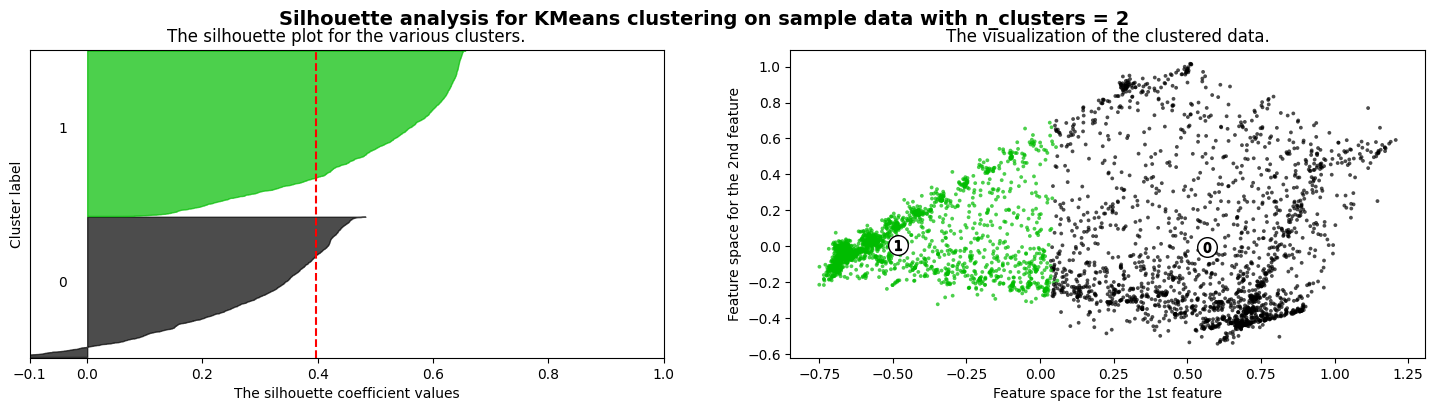

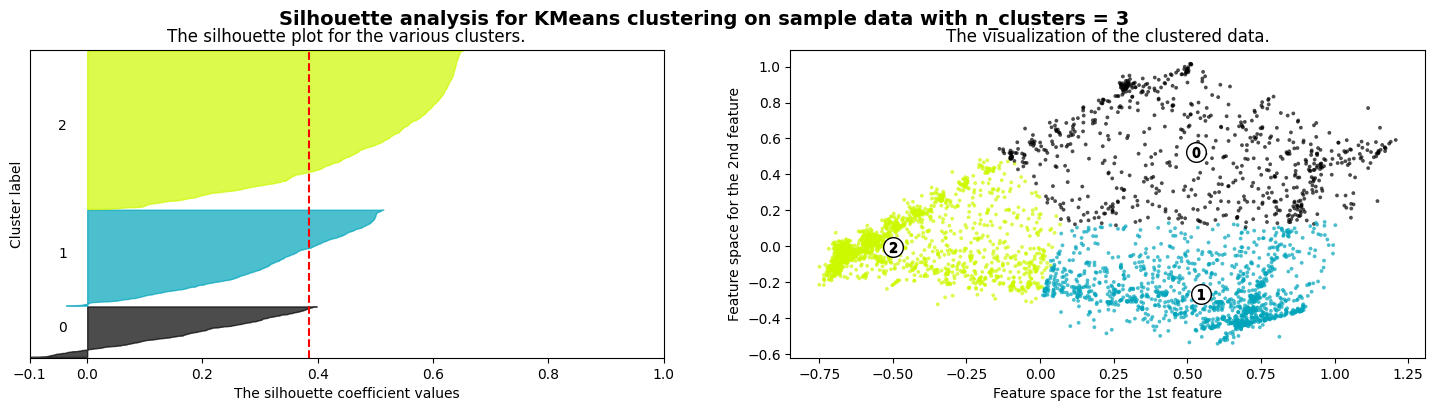

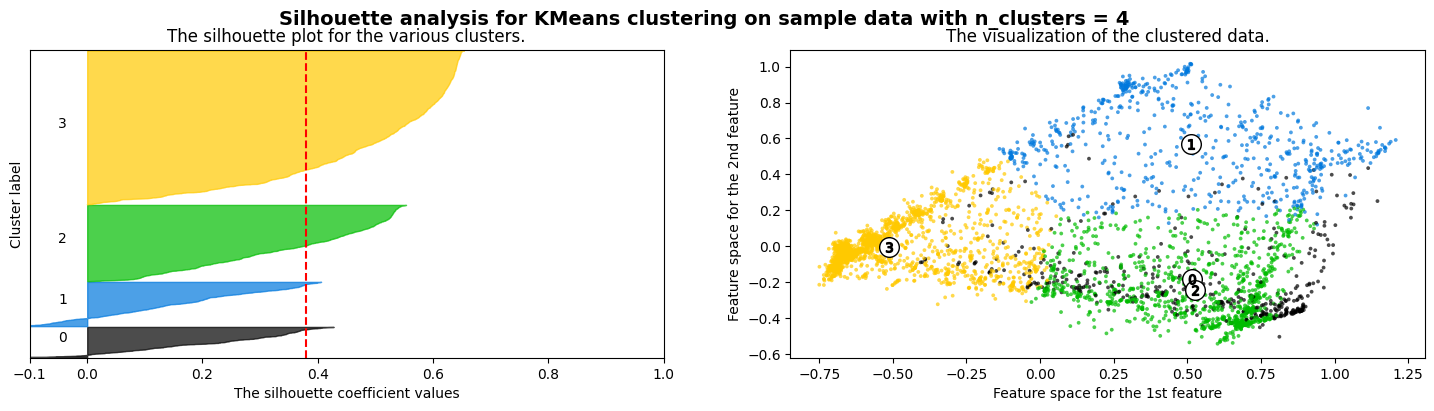

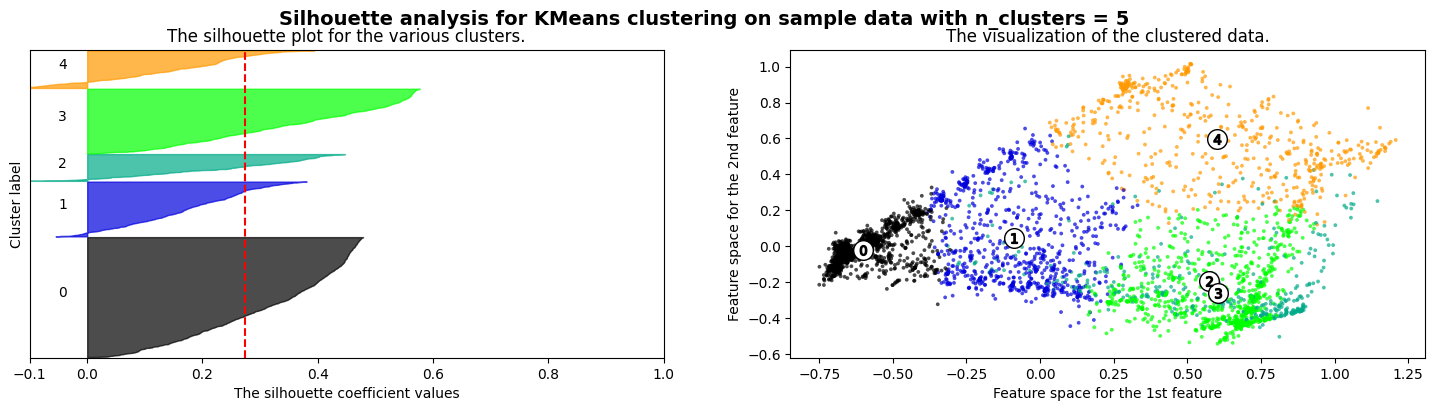

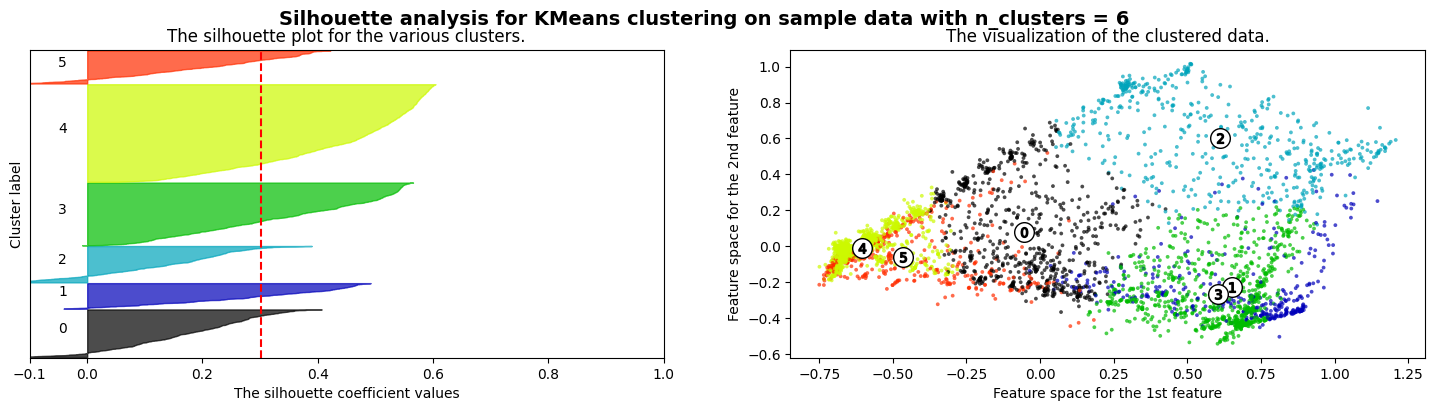

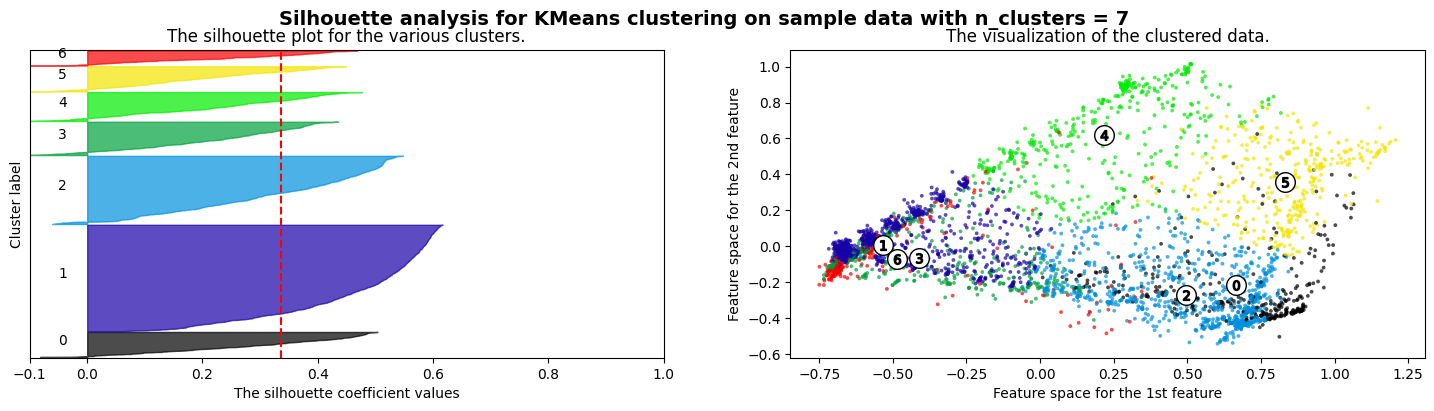

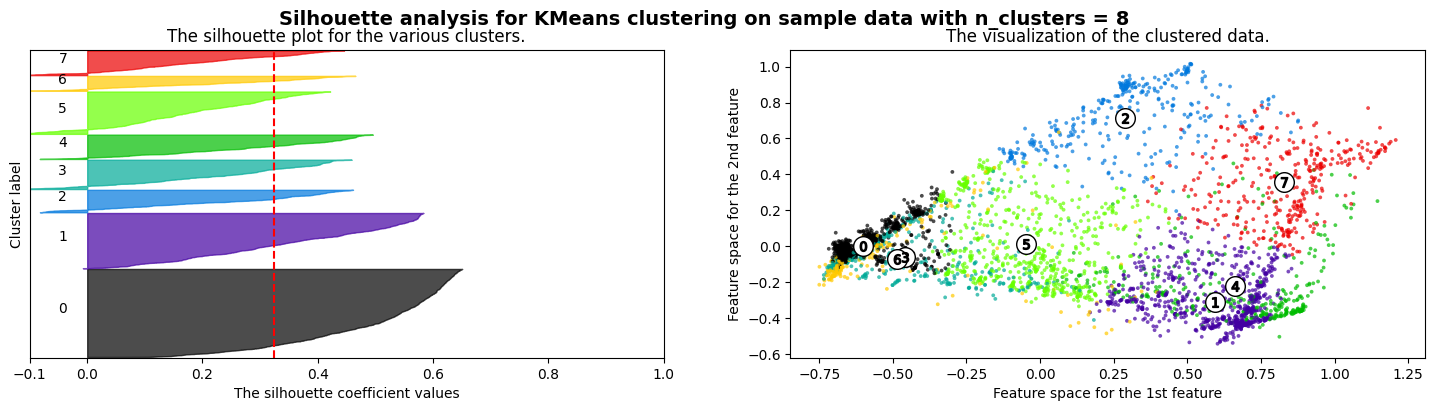

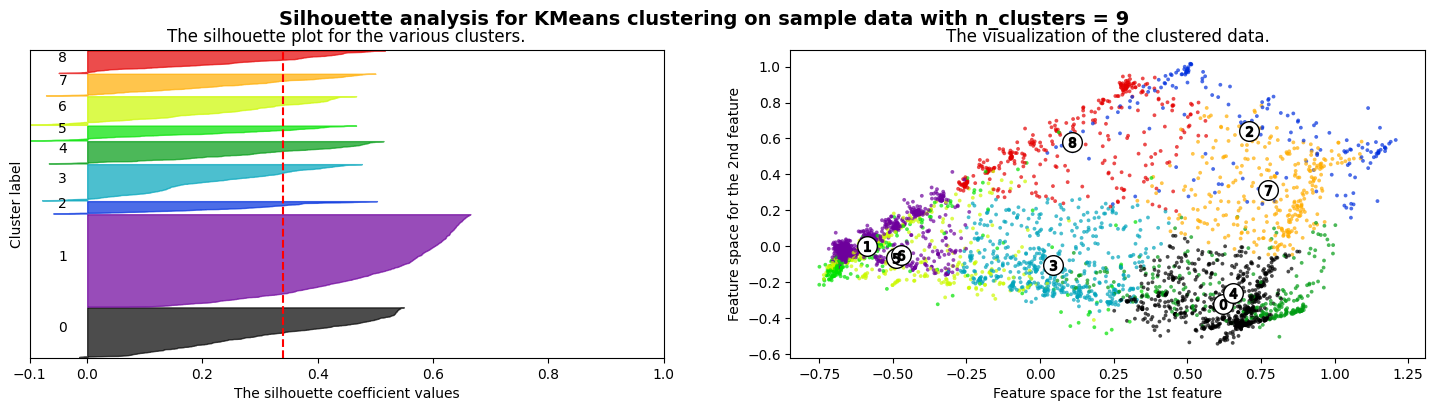

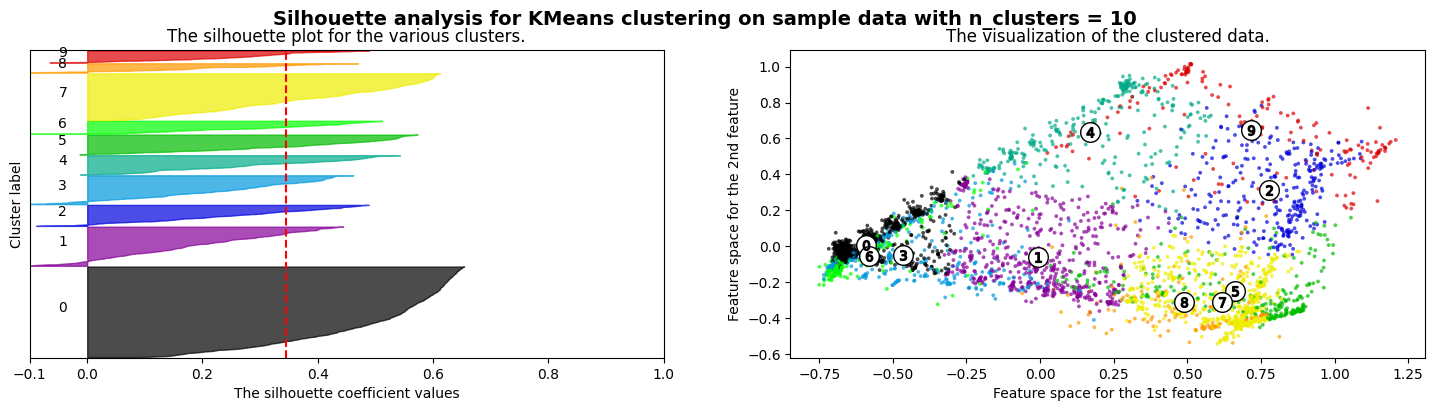

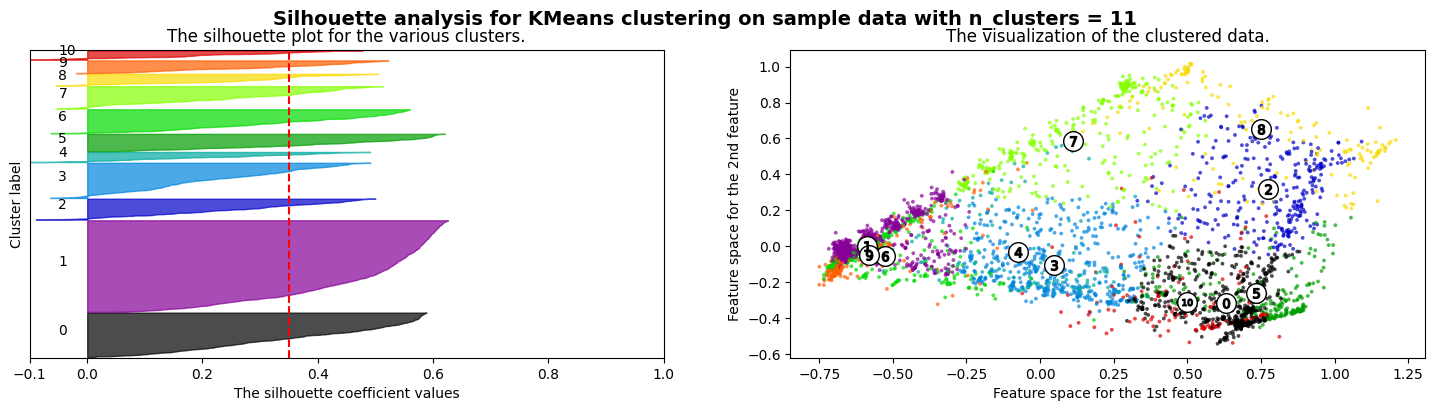

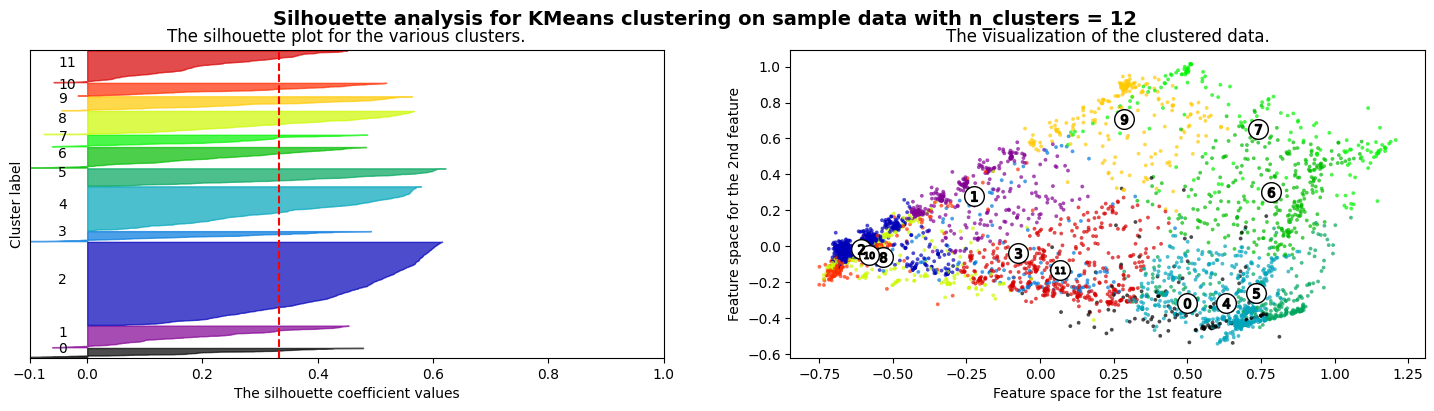

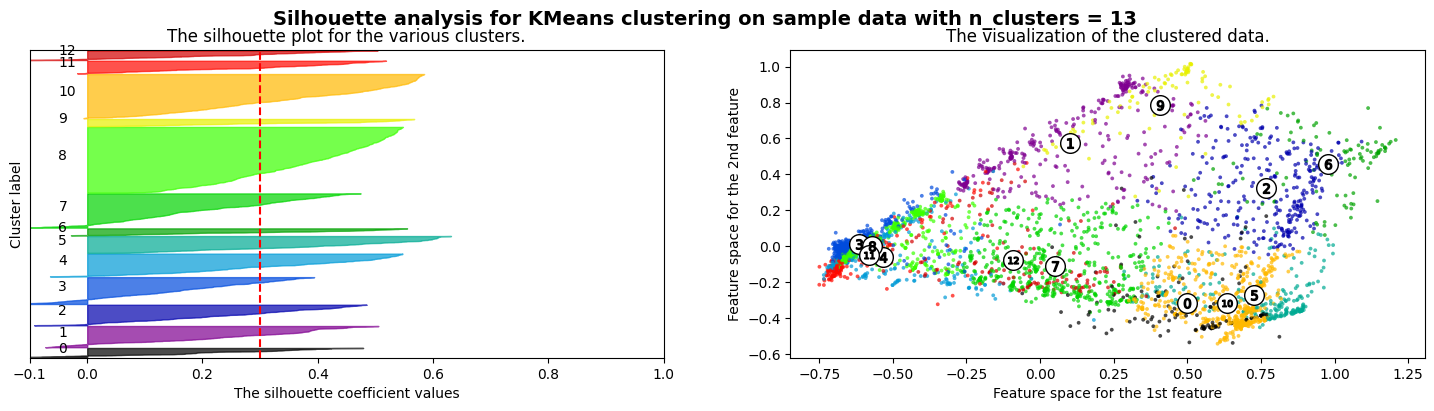

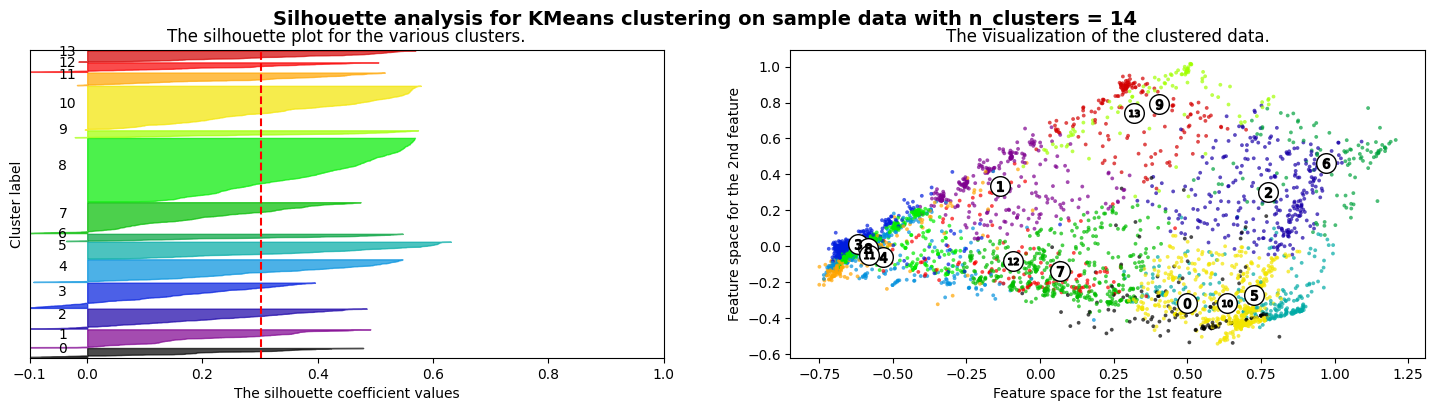

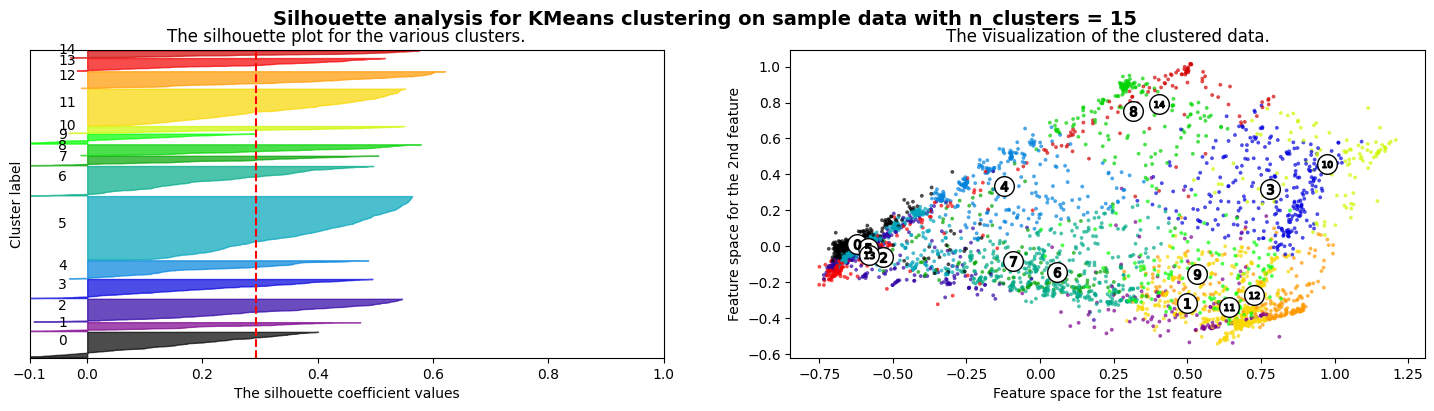

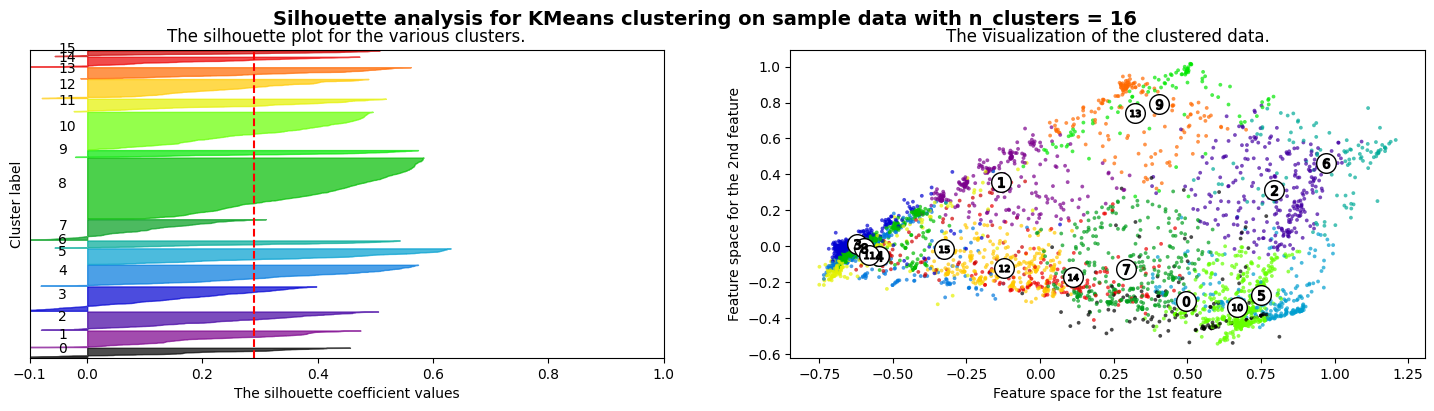

In [51]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Membuat subplot dengan 1 baris dan 2 kolom
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # Subplot pertama adalah plot siluet
        # Koefisien siluet dapat berkisar dari -1 sampai 1, tetapi dalam contoh ini semuanya berada dalam [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # (n_clusters+1)*10 adalah untuk memasukkan spasi kosong antara plot siluet dari setiap cluster, untuk membedakannya dengan jelas
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Inisialisasi clusterer dengan nilai n_clusters dan random generator seed 10 untuk reproduktifitas
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        # Skor siluet rata-rata memberikan nilai rata-rata untuk semua sampel
        # Ini memberikan perspektif tentang kepadatan dan pemisahan cluster yang terbentuk
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Menghitung skor siluet untuk setiap sampel
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Menggabungkan skor siluet untuk sampel yang termasuk dalam cluster i, dan mengurutkannya
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Memberi label plot siluet dengan nomor cluster di tengah
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Menghitung nilai y_lower baru untuk plot berikutnya
            y_lower = y_upper + 10  # 10 untuk sampel kosong

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Garis vertikal untuk skor siluet rata-rata dari semua nilai
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Menghapus label/tick sumbu y
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plot kedua menunjukkan cluster yang sebenarnya terbentuk
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Memberi label cluster
        centers = clusterer.cluster_centers_

        # Menggambar lingkaran putih di pusat cluster
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

# Menampilkan Skor Siluet dan Plot Siluet

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state=1)

Dari `Silhouette Visualization` saya memutuskan untuk memilih 3 sebagai cluster karena:

1. Nilai kedua tertinggi
2. Terlihat dari visualisasi cluster tidak ada yang tumpang tindih

# VIII. **MODEL TRAINING**

In [52]:
# Inisialisasi objek KMeans dengan parameter tertentu
km = KMeans(
    n_clusters = 3,          # Menentukan jumlah kluster yang diinginkan, dalam hal ini 3 kluster
    init = 'k-means++',      # Metode inisialisasi untuk memilih pusat kluster awal, 'k-means++' untuk memilih titik yang jauh terpisah untuk mempercepat konvergensi
    max_iter = 300,          # Maksimum iterasi untuk algoritma k-means, untuk mencegah loop tak berujung
    n_init = 10,             # Jumlah kali algoritma k-means akan dijalankan dengan centroid awal yang berbeda, dan hasil terbaik akan dipilih
    random_state = 1         # Seed untuk generator angka acak, memastikan hasil yang dapat direproduksi
)

# Menerapkan algoritma k-means pada data yang telah di-scale dan direduksi dengan PCA, kemudian mengembalikan label kluster untuk setiap titik data
cluster = km.fit_predict(df_scaled_pca)

# Menampilkan hasil klustering berupa label kluster untuk setiap titik data
cluster


array([2, 2, 2, ..., 2, 2, 2])

In [53]:
# Mengambil jumlah iterasi yang dibutuhkan oleh algoritma k-means untuk konvergen
km.n_iter_

11

Berarti setelah `11` kali *centroid re-assigned*, model K-Means sudah menemukan *centroid* optimalnya dengan nilai rerata terendah atau konvergensi

# EDA CLUSTER

## Combining Cluster into original Data Frame

In [54]:
# Insert clustering result into original dataset
df1['CLUSTER'] = cluster

df1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2        6075   757.964752              0.875      157.4             157.4   
3        6291   264.566591              0.375     1150.0            1150.0   
4        7755   440.613643              1.000      600.0             600.0   
5        8299   611.561026              1.000      765.0             765.0   
7        8805   105.333584              0.375      306.0             306.0   
...       ...          ...                ...        ...               ...   
4470     2345  9629.808851              1.000        0.0               0.0   
4471     6785  1040.030221              1.000        0.0               0.0   
4472     7347  1322.818587              1.000        0.0               0.0   
4473     8447  1060.391273              1.000        0.0               0.0   
4474     1995  3447.674222              1.000      205.0             205.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
5                        0.0      0.000000             0.125000   
7                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
5                       0.125000                               0.0   
7                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
5                   0.000000                 0              1        2000.0   
7                   0.000000                 0              2        6000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
2     1494.480376       2638.598410               0.0       8        2  
3     3029.380326         85.428885               0.0       8        2  
4      215.316424        137.846006               0.0       8        2  
5      204.464151        146.352314               0.0       8        2  
7      101.986927        118.324082               0.0       8        2  
...           ...               ... 

## Create Dataframe Variable for each columns

In [55]:
# Analisa berdasarkan variabel
cluster_0 = df1[df1.CLUSTER == 0]  # Membuat subset dataframe df1 untuk cluster 0
cluster_1 = df1[df1.CLUSTER == 1]  # Membuat subset dataframe df1 untuk cluster 1
cluster_2 = df1[df1.CLUSTER == 2]  # Membuat subset dataframe df1 untuk cluster 2


## Central Tendency

In [56]:
# Loop melalui setiap kolom di cluster_0
for i in cluster_0.columns:
    # Cetak nama kolom
    print(i)
    # Cetak ringkasan statistik kolom
    print(cluster_0[i].describe())
    # Cetak garis pemisah
    print("-"*30)



CUST_ID
count     717.000000
mean     4492.244073
std      2674.585185
min         3.000000
25%      2157.000000
50%      4519.000000
75%      6839.000000
max      8947.000000
Name: CUST_ID, dtype: float64
------------------------------
BALANCE
count      717.000000
mean      1876.512778
std       2377.651133
min          0.413670
25%        265.920698
50%        926.458992
75%       2516.753364
max      18495.558550
Name: BALANCE, dtype: float64
------------------------------
BALANCE_FREQUENCY
count    717.000000
mean       0.974961
std        0.080343
min        0.181818
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: BALANCE_FREQUENCY, dtype: float64
------------------------------
PURCHASES
count      717.000000
mean      3164.635704
std       3818.854126
min          8.400000
25%       1082.980000
50%       2099.890000
75%       3875.710000
max      41050.400000
Name: PURCHASES, dtype: float64
------------------------------
ONEOFF_PURCHASES
cou

In [57]:
# looping cluster_1
for i in cluster_1.columns:
    # Cetak nama kolom
    print(i)
    # Cetak ringkasan statistik kolom
    print(cluster_1[i].describe())
    # Cetak garis pemisah
    print("-"*30)


CUST_ID
count    1359.000000
mean     4496.551141
std      2597.270185
min         5.000000
25%      2243.000000
50%      4533.000000
75%      6755.000000
max      8949.000000
Name: CUST_ID, dtype: float64
------------------------------
BALANCE
count     1359.000000
mean      1203.091746
std       1933.170040
min          0.000000
25%         65.501293
50%        366.688990
75%       1434.780386
max      16115.596400
Name: BALANCE, dtype: float64
------------------------------
BALANCE_FREQUENCY
count    1359.000000
mean        0.927424
std         0.160351
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64
------------------------------
PURCHASES
count     1359.000000
mean      1129.314709
std       1407.728214
min         58.320000
25%        343.245000
50%        646.280000
75%       1347.305000
max      14686.100000
Name: PURCHASES, dtype: float64
------------------------------
ONEOFF_PURCH

In [58]:
# looping cluster_2
for i in cluster_2.columns:
    # Cetak nama kolom
    print(i)
    # Cetak ringkasan statistik kolom
    print(cluster_2[i].describe())
    # Cetak garis pemisah
    print("-"*30)


CUST_ID
count    2244.000000
mean     4458.563280
std      2556.481293
min         1.000000
25%      2228.000000
50%      4426.000000
75%      6671.500000
max      8945.000000
Name: CUST_ID, dtype: float64
------------------------------
BALANCE
count     2244.000000
mean      1756.516310
std       2037.404133
min          0.000000
25%        264.854870
50%       1112.013001
75%       2338.089307
max      14581.459140
Name: BALANCE, dtype: float64
------------------------------
BALANCE_FREQUENCY
count    2244.000000
mean        0.849496
std         0.247940
min         0.000000
25%         0.750000
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64
------------------------------
PURCHASES
count     2244.000000
mean       279.314447
std        728.568150
min          0.000000
25%          0.000000
50%         54.350000
75%        306.227500
max      17945.000000
Name: PURCHASES, dtype: float64
------------------------------
ONEOFF_PURCH

## 2D Visualization

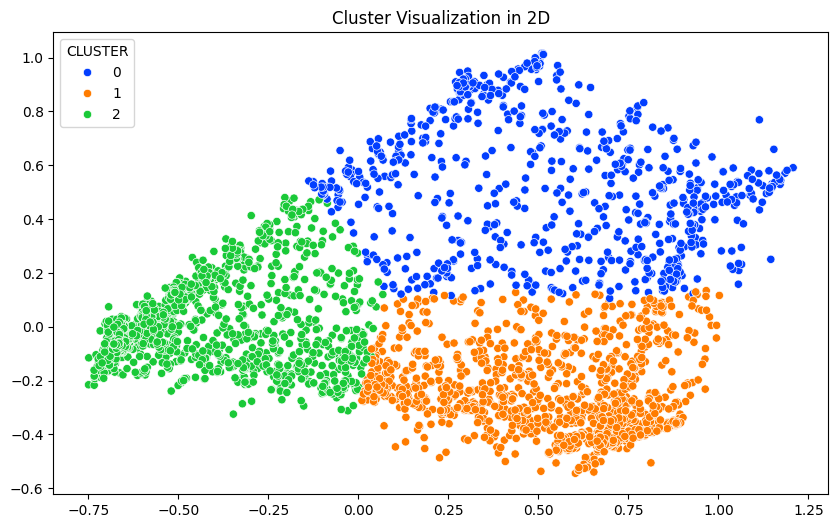

In [59]:
# Melakukan PCA untuk reduksi dimensi ke 2 komponen utama
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled_pca)
scaled_pca_2d = pca_2d.transform(df_scaled_pca)

# Membuat scatter plot untuk visualisasi klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_pca_2d[:, 0], y=scaled_pca_2d[:, 1], hue=df1['CLUSTER'], palette='bright')
plt.title('Cluster Visualization in 2D')

plt.show()

- Visualisasi cluster dengan 7 komponen setelah dilakukan dimension reduction PCA dengan nomor cluster 3

## Cluster Instalment Frequency

In [60]:
# Grouping data berdasarkan kolom 'CLUSTER' dan menghitung rata-rata dari kolom 'PURCHASES_INSTALLMENTS_FREQUENCY' dan 'PAYMENTS' untuk setiap kluster
df1.groupby(['CLUSTER']).agg({
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'mean',  # Menghitung rata-rata frekuensi pembelian dengan pembayaran angsuran
    'PAYMENTS': 'mean'  # Menghitung rata-rata pembayaran
})

PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS
CLUSTER                                               
0                                0.469565  3280.839997
1                                0.821947  1464.776040
2                                0.060316  1497.433241

- Customer Cluster 0 melakukan transaksi dengan metode cicil saat membeli produk/jasa dengan jumlah transaksi yang rendah. Artinya, mereka lebih cenderung membayar cicilan dengan jumlah kecil

- Customer Cluster 1 jarang menggunakan metode cicil tetapi jumlah pembayarannya tinggi. Artinya, mereka cenderung melakukan pembayaran penuh

- Customer Cluster 2 aktif menggunakan cicilan dan memiliki jumlah pembayaran yang sangat tinggi. Artinya, mereka cenderung melakukan pembelian besar dengan cicilan

<Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='PAYMENTS'>

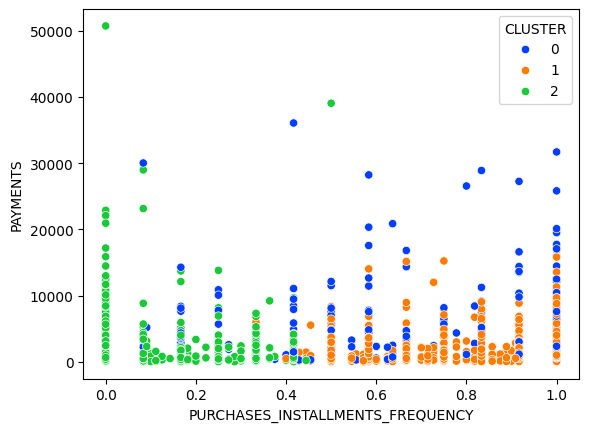

In [61]:
# Melakukan scatter plot menggunakan seaborn
sns.scatterplot(data=df1, x="PURCHASES_INSTALLMENTS_FREQUENCY", y="PAYMENTS", hue="CLUSTER", palette="bright")


## Cluster Balance Frequency

In [62]:
# Melakukan groupby pada dataframe df1 berdasarkan kolom 'CLUSTER'
# Kemudian menghitung rata-rata dari kolom 'BALANCE_FREQUENCY' dan 'PAYMENTS' untuk setiap kelompok kluster
df1.groupby(['CLUSTER']).agg({'BALANCE_FREQUENCY': 'mean', 'PAYMENTS': 'mean'})


BALANCE_FREQUENCY     PAYMENTS
CLUSTER                                
0                 0.974961  3280.839997
1                 0.927424  1464.776040
2                 0.849496  1497.433241

- `Cluster 0`: Pelanggan rutin membayar tagihan dengan jumlah rendah hingga sedang, menjaga saldo kartu kredit tetap up-to-date.

- `Cluster 1`: Pelanggan sering melakukan pembayaran besar, aktif mengurangi saldo kartu kredit.

- `Cluster 2`: Pelanggan sangat aktif membayar tagihan dengan jumlah sangat besar, menjaga saldo kartu kredit tetap rendah atau melakukan pembayaran besar secara berkala.

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='PAYMENTS'>

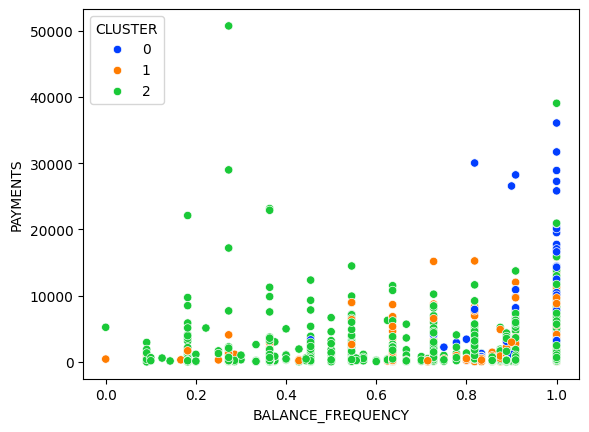

In [63]:
# Melakukan scatter plot menggunakan seaborn
# Menggunakan data dari dataframe df1, dengan sumbu x sebagai "BALANCE_FREQUENCY" dan sumbu y sebagai "PAYMENTS"
# Memetakan warna berdasarkan kolom "CLUSTER" dan menggunakan skema warna "bright" dari palet
sns.scatterplot(data=df1, x="BALANCE_FREQUENCY", y="PAYMENTS", hue="CLUSTER", palette="bright")

## Cluster

* Cluster 0 ---> (`Nasabah Pratama`)

* Cluster 1 ---> (`Nasabah Madya`)

* Cluster 2 ---> (`Nasabah Prioritas`)

## Strategi Pemasaran Berdasarkan Cluster

### Cluster Nasabah Pratama
- **Karakteristik:** Aktif menggunakan fasilitas cicilan dengan jumlah pembayaran kecil.
- **Strategi:** 
  - Tingkatkan penggunaan cicilan dengan menawarkan program cicilan menarik seperti suku bunga rendah atau promosi khusus.
  - Kirimkan penawaran produk atau layanan yang sesuai dengan kebiasaan cicilan mereka.

### Cluster Nasabah Madya
- **Karakteristik:** Jarang menggunakan fasilitas cicilan namun memiliki jumlah pembayaran tinggi.
- **Strategi:** 
  - Fokuskan pemasaran pada produk atau layanan yang meningkatkan minat menggunakan cicilan, seperti insentif diskon atau cashback untuk pembayaran cicilan.

### Cluster Nasabah Prioritas
- **Karakteristik:** Aktif menggunakan fasilitas cicilan dengan jumlah pembayaran besar.
- **Strategi:** 
  - Jaga kepuasan pelanggan dengan penawaran eksklusif dan program insentif.
  - Pertimbangkan memperluas layanan cicilan untuk memenuhi kebutuhan mereka.

# X. **MODEL SAVING**

In [64]:
with open('model_scaler.pkl', 'wb') as file_1:
    pickle.dump(scaler, file_1)  # Menyimpan objek scaler ke dalam file model_scaler.pkl

with open('model_pca.pkl', 'wb') as file_2:
    pickle.dump(pca, file_2)  # Menyimpan objek pca ke dalam file model_pca.pkl

with open('model_kmeans.pkl', 'wb') as file_3:
    pickle.dump(km, file_3)  # Menyimpan objek km (model K-Means) ke dalam file model_kmeans.pkl


# XI. **MODEL INFERENCE**

*Model Inference dilakukan pada file `P1G6_Set_1_dendi_inf.ipnyb`*

# XII. **CONCLUSION**

## Model Analysis

Dalam analisa ini, dilakukan pengelompokkan data menggunakan algoritma K-Means dengan mempertimbangkan pembentukan 3 kluster berdasarkan metrik EVC-Cumm, Eigenvalues, Elbow Method, dan Silhouette. Kolom CUST_ID dikecualikan karena tidak memberikan informasi yang berguna, sementara kolom TENURE tidak digunakan karena sifatnya yang kategorikal. Untuk memfasilitasi analisis, kolom-kolom numerikal di-subject ke proses PCA dengan menggunakan Scaling MinMax. Pendekatan ini membantu dalam normalisasi data numerikal untuk perbandingan yang lebih adil, serta memungkinkan penggunaan algoritma K-Means yang hanya dapat menangani data numerikal.

Dengan mengimplementasikan PCA setelah scaling, dimensi dari dataset berhasil dikurangi, memfasilitasi interpretasi hasil kluster yang dihasilkan oleh K-Means. Pendekatan ini tidak hanya mempermudah proses analisis, tetapi juga meningkatkan pemahaman terhadap struktur data yang ada.

# XIII. **CONCEPTUAL PROBLEM**

#### Apakah yang dimaksud dengan inertia pada algoritma K-Means?

Inertia pada algoritma K-Means adalah metrik yang digunakan untuk mengukur seberapa baik titik-titik data dikelompokkan ke dalam cluster mereka. Secara spesifik, inertia merupakan jumlah dari jarak kuadrat terdekat setiap titik data ke centroid cluster terdekatnya. Dengan kata lain, inertia mengukur seberapa jauh titik-titik data dalam satu cluster dari centroid (pusat) cluster tersebut

#### Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)!

Elbow Method adalah teknik yang digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means. Ini dilakukan dengan menjalankan K-Means untuk berbagai jumlah cluster (K) dan menghitung inertia untuk masing-masing. Hasilnya digambarkan dalam sebuah plot dengan jumlah cluster pada sumbu x dan inertia pada sumbu y. Bentuk plot tersebut seringkali menyerupai sebuah siku (elbow), di mana titik siku tersebut menunjukkan jumlah cluster yang optimal.

**Cara Penggunaan**

1. Tentukan rentang jumlah kluster yang ingin diuji, hasil `num_features` (yang sudah didefinisikan sebelumnya) dari `cumsum` PCA atau efektivitas pembacaan/perwakilan (*Explained Variance Ratio - Cumulative*) kolom data setelah pengurangan dimensi oleh PCA. Atau bisa dibilang `num_feature` merupakan hasil pengurangan dimensi yang dilakukan PCA dengan efektifitas yang kita pilih.

2. Untuk setiap nilai dalam rentang `num_features` tsb., buat model K-Means dengan jumlah kluster tersebut dan hitung nilai *inertia* atau WCSS.

3. Plot grafik dari nilai *inertia* atau WCSS terhadap sumbu X jumlah kluster.
    
4. Tentukan titik 'siku' (*elbow point*) dari visualisasi grafik, titik di mana peningkatan jumlah kluster tidak lagi menghasilkan penurunan yang signifikan dalam *inertia* atau bentuknya mirip sudut pada siku lengan.

**Alasan Penggunaan Elbow Method**

Elbow Method digunakan untuk:
- **Menghindari Overfitting**: Dengan memilih jumlah cluster yang tepat, kita dapat mencegah model dari mengelompokkan data ke dalam terlalu banyak cluster yang tidak berarti.
- **Efisiensi**: Mengurangi jumlah cluster yang tidak perlu, sehingga membuat model lebih sederhana dan interpretatif.

Kelebihan Elbow Method
- **Sederhana dan Intuitif**: Mudah dipahami dan diimplementasikan.
- **Visual**: Memberikan visualisasi yang jelas untuk menentukan jumlah cluster optimal.

Kelemahan Elbow Method
- **Subyektivitas**: Menentukan titik elbow bisa subyektif dan terkadang tidak jelas.
- **Tidak Selalu Efektif**: Pada beberapa dataset, tidak ada titik elbow yang jelas, sehingga sulit untuk menentukan jumlah cluster optimal.
- **Skalabilitas**: Mungkin membutuhkan waktu komputasi yang besar jika dataset dan rentang K sangat besar.

Kesimpulan
- **Inertia** mengukur seberapa baik titik-titik data dikelompokkan dalam K-Means.
- **Elbow** Method adalah teknik untuk menentukan jumlah cluster optimal dengan melihat perubahan inertia saat menambah jumlah cluster.
- **Elbow** Method sederhana dan visual, namun bisa subjektif dan tidak selalu jelas untuk semua dataset.